In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import yfinance as yf 

In [142]:
# import data from yahoo finance 

data_new = yf.download(start="2000-01-01", end="2022-08-01", interval="1d", tickers=['YM=F', 'NQ=F', 'YM=F', 'NQ=F', 'ES=F', 'RTY=F', 'CL=F', 'GC=F', 'SI=F', 'NG=F','^GSPC', 'EURUSD=X', '^TNX'])

# 'YM=F' is the S&P 500 index 
# 'NQ=F' is the NASDAQ index 
# 'ES=F' is the EURO STOX index 
# 'RTY=F' is the Russell 2000 index 
# 'CL=F' is the Crude Oil index 
# 'GC=F' is the Gold index 
# 'SI=F' is the Silver index 
# 'NG=F' is the Natural Gas index 
# '^GSPC' is the S&P 500 index
# 'EURUSD=X' is the EURO/USD index 
# '^TNX' is the 10-year Treasury note index 



[*********************100%***********************]  11 of 11 completed


In [143]:
# change Tickers names to readable names 
data_new = data_new.stack().reset_index().rename(columns={'level_1':'Ticker'})
data_new['Ticker'] = data_new['Ticker'].map({'YM=F':'S&P 500', 'NQ=F':'NASDAQ', 'ES=F':'EURO STOX', 'RTY=F':'Russell 2000', 'CL=F':'Crude Oil', 'GC=F':'Gold', 'SI=F':'Silver', 'NG=F':'Natural Gas', '^GSPC':'S&P 500', 'EURUSD=X':'EURO/USD', '^TNX':'10-year Treasury note'})
data_new['Date'] = pd.to_datetime(data_new['Date'])

In [144]:
data_new.head()

,Date,Ticker,Adj Close,Close,High,Low,Open,Volume
0,1999-12-31,S&P 500,1469.250000,1469.250000,1472.420044,1458.189941,1464.469971,3.740500e+08
1,1999-12-31,10-year Treasury note,6.435000,6.435000,6.440000,6.377000,6.377000,0.000000e+00
2,2000-01-03,S&P 500,1455.219971,1455.219971,1478.000000,1438.359985,1469.250000,9.318000e+08
3,2000-01-03,10-year Treasury note,6.548000,6.548000,6.603000,6.498000,6.498000,0.000000e+00
4,2000-01-04,S&P 500,1399.420044,1399.420044,1455.219971,1397.430054,1455.219971,1.009000e+09


Ticker
10-year Treasury note    AxesSubplot(0.125,0.125;0.775x0.755)
Crude Oil                AxesSubplot(0.125,0.125;0.775x0.755)
EURO STOX                AxesSubplot(0.125,0.125;0.775x0.755)
EURO/USD                 AxesSubplot(0.125,0.125;0.775x0.755)
Gold                     AxesSubplot(0.125,0.125;0.775x0.755)
NASDAQ                   AxesSubplot(0.125,0.125;0.775x0.755)
Natural Gas              AxesSubplot(0.125,0.125;0.775x0.755)
Russell 2000             AxesSubplot(0.125,0.125;0.775x0.755)
S&P 500                  AxesSubplot(0.125,0.125;0.775x0.755)
Silver                   AxesSubplot(0.125,0.125;0.775x0.755)
Name: Close, dtype: object

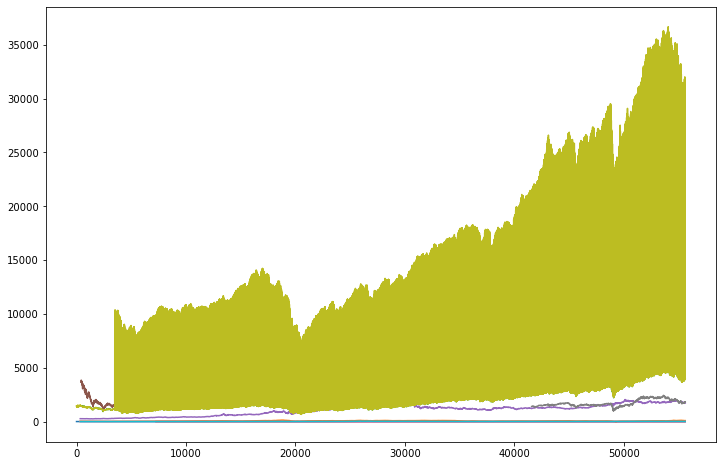

In [150]:
# plot each ticket close price
data_new.groupby('Ticker').Close.plot(figsize=(12,8))